In [37]:
from keras.utils import np_utils
import numpy as np
import pandas as pd
np.random.seed(10)
from keras.layers import Dropout

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label),(x_test_image, y_test_label) = mnist.load_data('mnist.npz')

## 数据预处理

In [3]:
#将二维图像转换成一维图像
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784)

In [4]:
#特征缩放
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#独热编码
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

## 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
'''
units:隐藏层神经元个数
input_dim:输入层神经元个数
kernel_initializer:使用正太分布的随机数来初始化weight权重和bias偏差
activation:激活函数为Relu
'''
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [9]:
'''
units:输出层神经元
'''
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


## 进行训练
使用反向传播算法进行训练

In [11]:
'''
loss:损失函数,交叉熵
optimizer:adam优化器可以让训练收敛更快,并提高准确率
metrics:设置评估模型的方式是准确率
'''
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
'''
validation_split:验证集占样本数据集的比例
epochs:训练周期次数
batch_size:每一批次项数
verbose:显示训练过程
'''
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot, validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
4s - loss: 0.4379 - acc: 0.8828 - val_loss: 0.2186 - val_acc: 0.9405
Epoch 2/10
2s - loss: 0.1916 - acc: 0.9451 - val_loss: 0.1564 - val_acc: 0.9553
Epoch 3/10
2s - loss: 0.1360 - acc: 0.9614 - val_loss: 0.1264 - val_acc: 0.9645
Epoch 4/10
2s - loss: 0.1031 - acc: 0.9700 - val_loss: 0.1126 - val_acc: 0.9683
Epoch 5/10
2s - loss: 0.0815 - acc: 0.9772 - val_loss: 0.0982 - val_acc: 0.9715
Epoch 6/10
2s - loss: 0.0662 - acc: 0.9817 - val_loss: 0.0940 - val_acc: 0.9722
Epoch 7/10
3s - loss: 0.0546 - acc: 0.9851 - val_loss: 0.0917 - val_acc: 0.9734
Epoch 8/10
2s - loss: 0.0462 - acc: 0.9876 - val_loss: 0.0831 - val_acc: 0.9762
Epoch 9/10
2s - loss: 0.0382 - acc: 0.9903 - val_loss: 0.0819 - val_acc: 0.9761
Epoch 10/10
2s - loss: 0.0319 - acc: 0.9914 - val_loss: 0.0805 - val_acc: 0.9769


## 建立show_train_history显示训练过程

In [13]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

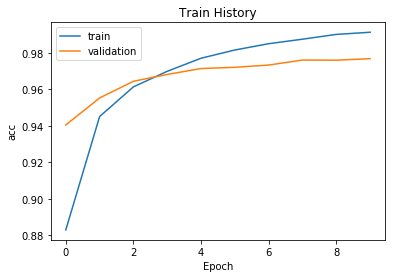

In [14]:
show_train_history(train_history, 'acc','val_acc')

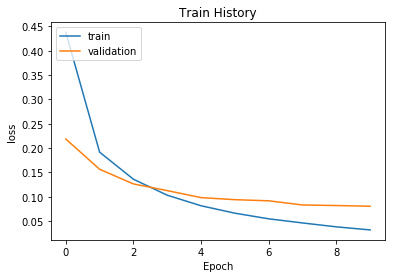

In [15]:
show_train_history(train_history,'loss','val_loss')

## 以测试数据评估模型准确率

In [18]:
scores = model.evaluate(x_Test, y_Test_OneHot)
print()
print('accuracy=', scores[1])

 9696/10000 [============================>.] - ETA: 0s()
('accuracy=', 0.97640000000000005)


## 进行预测

In [17]:
prediction = model.predict_classes(x_Test)

 9888/10000 [============================>.] - ETA: 0s

In [19]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

7


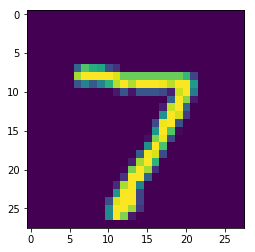

In [22]:
plt.imshow(x_test_image[0]);print(prediction[0])

## 显示混淆矩阵

In [24]:
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1007,2,1,0,2,3,10,1
3,0,0,3,993,0,1,0,3,6,4
4,1,0,5,1,961,0,3,0,3,8
5,2,0,0,14,1,856,7,1,8,3
6,5,3,2,1,3,3,938,0,3,0
7,0,5,14,5,1,0,0,989,6,8
8,4,0,3,5,2,1,1,2,955,1


In [25]:
#找出badcase
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [26]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


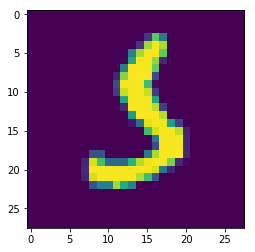

In [27]:
plt.imshow(x_test_image[340])

## 隐藏层增加为1000个神经元,用于提高准确率

In [29]:
model = Sequential()
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

#将输出层加入模型
model.add(Dense(units=10, kernel_initializer='normal',activation='softmax'))

In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])


In [34]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot, validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
12s - loss: 0.2944 - acc: 0.9149 - val_loss: 0.1531 - val_acc: 0.9568
Epoch 2/10
11s - loss: 0.1184 - acc: 0.9657 - val_loss: 0.1079 - val_acc: 0.9678
Epoch 3/10
11s - loss: 0.0761 - acc: 0.9779 - val_loss: 0.0922 - val_acc: 0.9724
Epoch 4/10
10s - loss: 0.0519 - acc: 0.9852 - val_loss: 0.0863 - val_acc: 0.9743
Epoch 5/10
11s - loss: 0.0361 - acc: 0.9901 - val_loss: 0.0751 - val_acc: 0.9766
Epoch 6/10
11s - loss: 0.0257 - acc: 0.9934 - val_loss: 0.0732 - val_acc: 0.9774
Epoch 7/10
11s - loss: 0.0186 - acc: 0.9959 - val_loss: 0.0730 - val_acc: 0.9793
Epoch 8/10
10s - loss: 0.0132 - acc: 0.9973 - val_loss: 0.0707 - val_acc: 0.9790
Epoch 9/10
9s - loss: 0.0089 - acc: 0.9988 - val_loss: 0.0717 - val_acc: 0.9799
Epoch 10/10
9s - loss: 0.0064 - acc: 0.9992 - val_loss: 0.0725 - val_acc: 0.9795


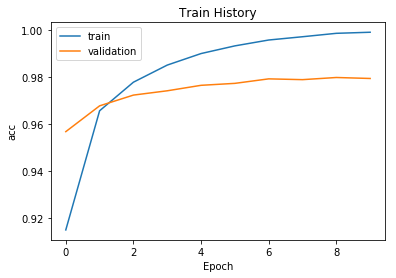

In [35]:
show_train_history(train_history, 'acc', 'val_acc')

In [36]:
scores = model.evaluate(x_Test, y_Test_OneHot)
print()
print('accuracy=', scores[1])

 9920/10000 [============================>.] - ETA: 0s()
('accuracy=', 0.97860000000000003)


## 多层感知器加入Dropout功能以避免过度拟合

In [38]:
model = Sequential()
model.add(Dense(units=1000, input_dim=784,kernel_initializer='normal',activation='relu'))

In [39]:
model.add(Dropout(0.5))

In [40]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [41]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
train_history = model.fit(x=x_Train, y=y_Train_OneHot, validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
11s - loss: 5.0025 - acc: 0.6891 - val_loss: 4.9462 - val_acc: 0.6927
Epoch 2/10
11s - loss: 5.1796 - acc: 0.6782 - val_loss: 3.9772 - val_acc: 0.7530
Epoch 3/10
10s - loss: 3.5678 - acc: 0.7781 - val_loss: 2.1291 - val_acc: 0.8672
Epoch 4/10
10s - loss: 2.7940 - acc: 0.8262 - val_loss: 1.7851 - val_acc: 0.8890
Epoch 5/10
10s - loss: 2.9509 - acc: 0.8165 - val_loss: 2.3129 - val_acc: 0.8562
Epoch 6/10
11s - loss: 2.4549 - acc: 0.8474 - val_loss: 1.4111 - val_acc: 0.9124
Epoch 7/10
10s - loss: 2.1933 - acc: 0.8635 - val_loss: 1.7512 - val_acc: 0.8911
Epoch 8/10
10s - loss: 2.2301 - acc: 0.8612 - val_loss: 1.8270 - val_acc: 0.8863
Epoch 9/10
10s - loss: 2.4235 - acc: 0.8493 - val_loss: 1.6937 - val_acc: 0.8947
Epoch 10/10
12s - loss: 2.2578 - acc: 0.8597 - val_loss: 1.3401 - val_acc: 0.9167


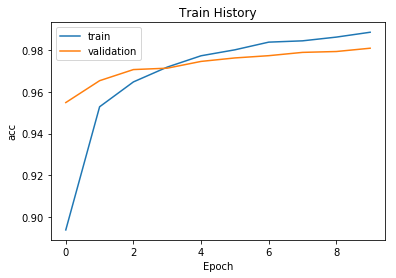

In [45]:
show_train_history(train_history,'acc','val_acc')

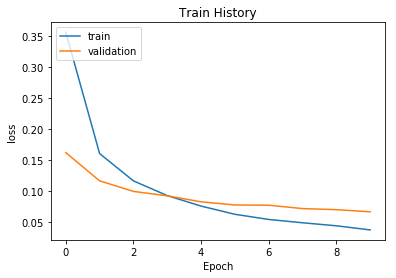

In [46]:
show_train_history(train_history,'loss','val_loss')

In [48]:
scores = model.evaluate(x_Test, y_Test_OneHot)
print()
print('accuracy=',scores[1])

 9920/10000 [============================>.] - ETA: 0s()
('accuracy=', 0.97970000000000002)


## 建立多层感知器模型包含两个隐藏层

In [51]:
model = Sequential()
model.add(Dense(units=1000, input_dim=784,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,kernel_initializer='normal',
               activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [52]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [53]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
train_history = model.fit(x=x_Train, y=y_Train_OneHot,verbose=2,batch_size=200, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
29s - loss: 11.7581 - acc: 0.2698 - val_loss: 10.4679 - val_acc: 0.3504
Epoch 2/10
30s - loss: 11.2075 - acc: 0.3045 - val_loss: 10.4792 - val_acc: 0.3498
Epoch 3/10
31s - loss: 10.6955 - acc: 0.3364 - val_loss: 10.3557 - val_acc: 0.3575
Epoch 4/10
30s - loss: 12.3099 - acc: 0.2362 - val_loss: 10.5632 - val_acc: 0.3446
Epoch 5/10
27s - loss: 11.7742 - acc: 0.2694 - val_loss: 11.9561 - val_acc: 0.2582
Epoch 6/10
25s - loss: 10.9728 - acc: 0.3191 - val_loss: 10.6658 - val_acc: 0.3383
Epoch 7/10
23s - loss: 10.8754 - acc: 0.3252 - val_loss: 10.0980 - val_acc: 0.3735
Epoch 8/10
24s - loss: 10.8415 - acc: 0.3273 - val_loss: 11.0369 - val_acc: 0.3153
Epoch 9/10
23s - loss: 10.9040 - acc: 0.3234 - val_loss: 10.4971 - val_acc: 0.3487
Epoch 10/10
23s - loss: 11.0432 - acc: 0.3149 - val_loss: 10.6366 - val_acc: 0.3401


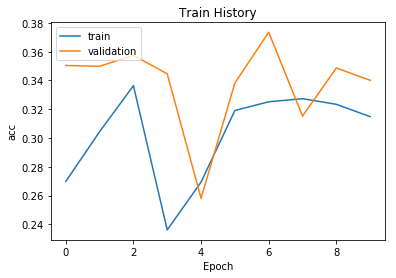

In [55]:
show_train_history(train_history, 'acc','val_acc')

In [57]:
score = model.evaluate(x_Test, y_Test_OneHot)
print()
print('accuracy=', scores[1])

 9984/10000 [============================>.] - ETA: 0s()
('accuracy=', 0.97970000000000002)
